<a href="https://colab.research.google.com/github/EdithOroche/IA/blob/main/Distribuciones_Discretas_SS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación y validación de distribuciones discretas

En este notebook trabajaremos con cinco distribuciones discretas:

- Bernoulli  
- Binomial  
- Geométrica  
- Poisson  
- Uniforme discreta  

Para cada una:

1. Recordaremos su definición y fórmula.
2. Indicaremos un uso típico en simulación.
3. Generaremos 100 datos "observados" (son los que tú vas a ir a levantar en campo para tú proyecto).
4. Generaremos 1000 datos "sintéticos" desde la distribución teórica.
5. Compararemos ambas muestras con:
   - Un gráfico (distplots superpuestos).
   - Una prueba de **Chi-cuadrado** para verificar si ambas muestras son consistentes entre sí.


# 1. Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, geom, poisson, randint, chisquare

rng = np.random.default_rng(123)

def chi2_gof_discreta(data, dist, titulo):
    """
    Prueba de bondad de ajuste Chi-cuadrado para una distribución discreta.
    - data: muestra observada (enteros)
    - dist: distribución de scipy.stats ya configurada (frozen), con pmf()
    - titulo: título para el gráfico
    """
    data = np.asarray(data, dtype=int)
    n = data.size

    # Categorías presentes en la muestra
    vals, obs_counts = np.unique(data, return_counts=True)

    # Probabilidades teóricas para esas mismas categorías
    pmf = dist.pmf(vals)

    # Si la suma de pmf en ese subconjunto no es 1 (por colas), renormalizamos
    pmf_sum = pmf.sum()
    if pmf_sum <= 0:
        raise ValueError("La pmf teórica sobre las categorías observadas es cero.")
    pmf = pmf / pmf_sum

    # Frecuencias esperadas
    exp_counts = pmf * n

    # Filtrar categorías con frecuencia esperada > 0 (evita problemas numéricos)
    mask = exp_counts > 0
    vals, obs_counts, exp_counts = vals[mask], obs_counts[mask], exp_counts[mask]

    # Gráfico: frecuencias relativas observadas vs esperadas
    width = 0.4
    plt.figure(figsize=(6,4))
    plt.bar(vals - width/2, obs_counts / n, width=width, label="Observada", alpha=0.8)
    plt.bar(vals + width/2, exp_counts / n, width=width, label="Esperada (teórica)", alpha=0.6)
    plt.xticks(vals)
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia relativa")
    plt.title(titulo)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Prueba Chi-cuadrado
    chi2, p = chisquare(f_obs=obs_counts, f_exp=exp_counts)
    print(f"Chi-cuadrado: {chi2:.4f}  |  p-value: {p:.4f}")
    if p > 0.05:
        print("No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.\n")
    else:
        print("Se rechaza la hipótesis: hay diferencias significativas.\n")

## 1. Distribución Bernoulli

**Definición:** Modela un solo experimento con dos resultados posibles:  
éxito (1) con probabilidad $p$, fracaso (0) con probabilidad $1-p$.

$$
P(X=1) = p,\quad P(X=0) = 1-p
$$

**Uso en simulación:** Presencia/ausencia de un evento, clic/no clic, defecto/no defecto, etc.


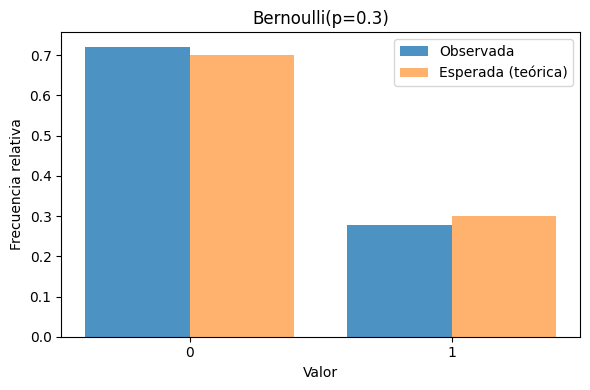

Chi-cuadrado: 2.1000  |  p-value: 0.1473
✅ No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [ ]:
# Bernoulli(p)
p = 0.3
data_bern = rng.binomial(n=1, p=p, size=1000)
dist_bern = bernoulli(p)
chi2_gof_discreta(data_bern, dist_bern, f"Bernoulli(p={p})")


## 2. Distribución Binomial

**Definición:** Cuenta el número de éxitos en \(n\) ensayos Bernoulli independientes,
cada uno con probabilidad de éxito $p$.

$$
P(X=k) = \binom{n}{k} p^k (1-p)^{n-k},\quad k=0,1,\dots,n
$$

**Uso en simulación:** Número de piezas defectuosas en un lote, aciertos en un test,
clientes que compran entre los contactados, etc.


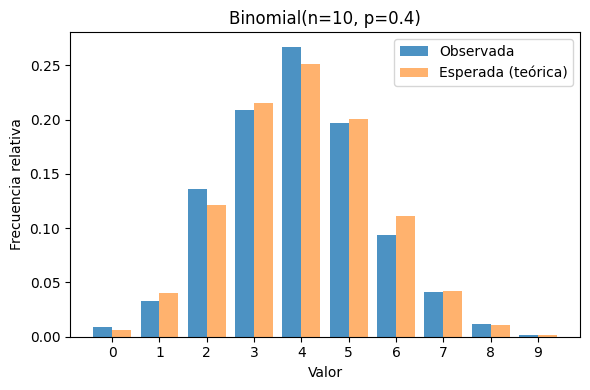

Chi-cuadrado: 9.0087  |  p-value: 0.4365
✅ No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [ ]:
# Binomial(n, p)
n, p = 10, 0.4
data_binom = rng.binomial(n=n, p=p, size=1000)
dist_binom = binom(n, p)
chi2_gof_discreta(data_binom, dist_binom, f"Binomial(n={n}, p={p})")

## 3. Distribución Geométrica

**Convención (SciPy):** Número de ensayos hasta el primer éxito (incluyendo el éxito), con probabilidad $p$.

$$
P(X=k) = (1-p)^{k-1} p,\quad k=1,2,3,\dots
$$

**Uso en simulación:** Número de intentos hasta lograr un evento: primer cliente que compra,
primer fallo, primer acierto, etc.


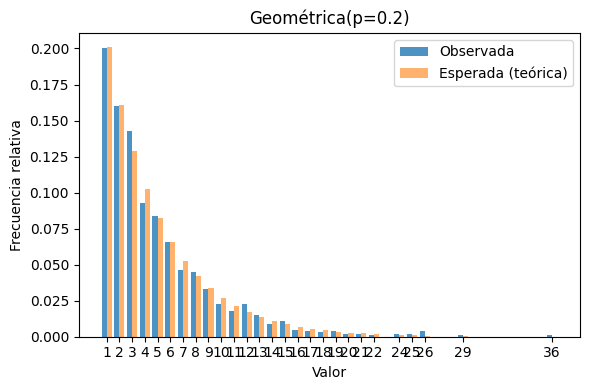

Chi-cuadrado: 37.0074  |  p-value: 0.0746
✅ No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [ ]:
# Geométrica(p) (SciPy: soporte k = 1, 2, 3, ...)
p = 0.2
data_geom = rng.geometric(p, size=1000)
dist_geom = geom(p)
chi2_gof_discreta(data_geom, dist_geom, f"Geométrica(p={p})")


## 4. Distribución Poisson

**Definición:** Modela el número de eventos que ocurren en un intervalo,
cuando estos suceden de forma independiente con tasa promedio $\lambda$.

$$
P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!},\quad k=0,1,2,\dots
$$

**Uso en simulación:** Llegadas por unidad de tiempo (clientes, llamadas, pedidos),
número de accidentes, errores, etc.


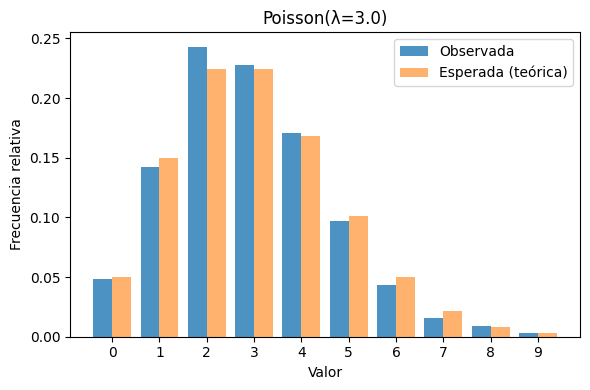

Chi-cuadrado: 4.9671  |  p-value: 0.8372
✅ No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [ ]:
# Poisson(λ)
lam = 3.0
data_pois = rng.poisson(lam=lam, size=1000)
dist_pois = poisson(mu=lam)
chi2_gof_discreta(data_pois, dist_pois, f"Poisson(λ={lam})")

## 5. Distribución Uniforme Discreta

**Definición:** Todos los valores enteros en $\{a, a+1, \dots, b\}$ tienen la misma probabilidad.

$
P(X=x) = \frac{1}{b-a+1},\quad x=a,\dots,b
$

**Uso en simulación:** Modelar elecciones equiprobables:
lanzamiento de un dado justo, selección aleatoria entre alternativas simétricas, etc.


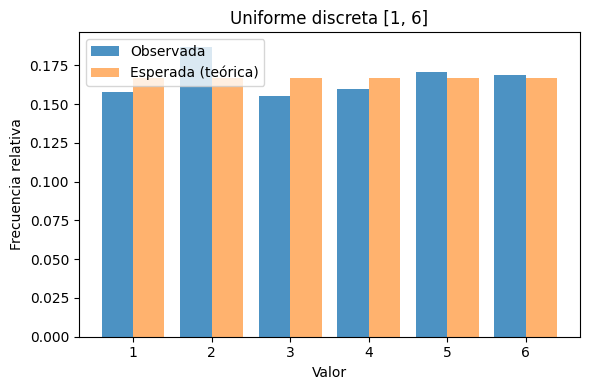

Chi-cuadrado: 4.1600  |  p-value: 0.5266
✅ No se rechaza la hipótesis: la muestra es consistente con la distribución teórica.



In [ ]:
# Uniforme discreta {a,...,b}
a, b = 1, 6
data_uni = rng.integers(a, b+1, size=1000)
dist_uni = randint(a, b+1)  # randint es uniforme discreta en [a, b)
chi2_gof_discreta(data_uni, dist_uni, f"Uniforme discreta [{a}, {b}]")